In [5]:
%run ./generic_functions.ipynb

In [58]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta 
import matplotlib.pyplot as plt
import seaborn as sns
# Generate datetime column with hourly frequency 
start_date = datetime.now() - timedelta(days=41.65) 
end_date = datetime.now() 
date_range = pd.date_range(start=start_date, end=end_date, freq='H')
date_range

DatetimeIndex(['2023-04-11 04:11:07.400629', '2023-04-11 05:11:07.400629',
               '2023-04-11 06:11:07.400629', '2023-04-11 07:11:07.400629',
               '2023-04-11 08:11:07.400629', '2023-04-11 09:11:07.400629',
               '2023-04-11 10:11:07.400629', '2023-04-11 11:11:07.400629',
               '2023-04-11 12:11:07.400629', '2023-04-11 13:11:07.400629',
               ...
               '2023-05-22 10:11:07.400629', '2023-05-22 11:11:07.400629',
               '2023-05-22 12:11:07.400629', '2023-05-22 13:11:07.400629',
               '2023-05-22 14:11:07.400629', '2023-05-22 15:11:07.400629',
               '2023-05-22 16:11:07.400629', '2023-05-22 17:11:07.400629',
               '2023-05-22 18:11:07.400629', '2023-05-22 19:11:07.400629'],
              dtype='datetime64[ns]', length=1000, freq='H')

In [106]:
# Minimum, maximum, mean, quartiles, and standard deviation values for each feature
#Telemetry [Oil Temparature, Oil Humidity, Tool Current Flow, FBC, Pressure Set Point]
#Production data [Production Count, Spoilage Count]
#Sensory Data [Speed, Faults] Faults 
min_values = np.array([18, 1800, 0, -7, -2551, 0, 0, -24, 0])
max_values = np.array([4, 429, 99, 125, 54320, 14195, 14192, 1629, 10])
mean_values = np.array([3, 320, 40, 85, 44884, 74, 1551, 1000, 1])
q1_values = np.array([3, 38, 0, 87, 38800, 2103, 2095, 70, 1])
q3_values = np.array([4, 41, 65, 99, 54320, 4449,4443, 79, 10])
std_dev_values = np.array([1, 127, 31, 24, 54320, 14195, 14192, 103, 8])

# Number of samples in the dataset
num_samples = 1000

# Generate random dataset based on the given statistics
dataset = np.zeros((num_samples, len(min_values)))
for i in range(len(min_values)):
    dataset[:, i] = np.random.uniform(q1_values[i], q3_values[i], size=num_samples)
    dataset[:, i] = np.clip(dataset[:, i], min_values[i], max_values[i])

# Print the generated dataset
#print(dataset)
columns=['Oil Temparature', 'Oil Humidity', 'Tool Current Flow', 'FBC', 'Pressure Set Point', 'Production Count', 'Spoilage Count', 'Speed', 'Maintenance Faults']
df = pd.DataFrame(dataset, columns=['Oil Temparature', 'Oil Humidity', 'Tool Current Flow', 'FBC', 'Pressure Set Point', 'Production Count', 'Spoilage Count', 'Speed', 'Maintenance Faults'])
#df.to_csv('file1.csv')

df['time_stamp'] = date_range
#df.set_index(['time_stamp'])
df.to_csv('dataset.csv') # saving the dataframe
df.head()

,Oil Temparature,Oil Humidity,Tool Current Flow,FBC,Pressure Set Point,Production Count,Spoilage Count,Speed,Maintenance Faults,time_stamp
0,4.0,429.0,18.013512,97.165022,53304.905521,2326.499495,3758.346557,70.386684,4.250590,2023-04-11 04:11:07.400629
1,4.0,429.0,49.195930,94.129017,48038.818654,3727.291428,2255.115276,76.873146,7.715760,2023-04-11 05:11:07.400629
2,4.0,429.0,37.409986,95.525039,53394.756013,2413.684444,4257.293598,76.193555,9.750092,2023-04-11 06:11:07.400629
3,4.0,429.0,45.979937,96.205310,39805.807906,3351.856375,3103.678908,73.533705,1.776740,2023-04-11 07:11:07.400629
4,4.0,429.0,50.779906,94.455184,52763.749698,2955.000320,3780.046811,73.593438,5.711349,2023-04-11 08:11:07.400629


In [107]:
# Five point summary 
df.describe()

,Oil Temparature,Oil Humidity,Tool Current Flow,FBC,Pressure Set Point,Production Count,Spoilage Count,Speed,Maintenance Faults
count,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.0,429.0,32.857208,93.149338,46467.253235,3302.693771,3254.651859,74.488184,5.485988
std,0.0,0.0,18.728800,3.418693,4589.197889,663.245326,655.503161,2.597258,2.641054
min,4.0,429.0,0.043954,87.021184,38802.560351,2105.634170,2096.574327,70.008207,1.005051
25%,4.0,429.0,16.669281,90.441950,42493.796763,2735.657870,2707.498494,72.195589,3.187597
50%,4.0,429.0,33.004136,93.217290,46428.874288,3318.508432,3262.954263,74.480090,5.495476
75%,4.0,429.0,49.143809,96.059374,50144.685043,3876.666742,3780.192421,76.681684,7.759740
max,4.0,429.0,64.986810,98.995385,54313.361489,4448.874114,4440.227341,78.999657,9.995175


In [108]:
df.columns

Index(['Oil Temparature', 'Oil Humidity', 'Tool Current Flow', 'FBC',
       'Pressure Set Point', 'Production Count', 'Spoilage Count', 'Speed',
       'Maintenance Faults', 'time_stamp'],
      dtype='object')

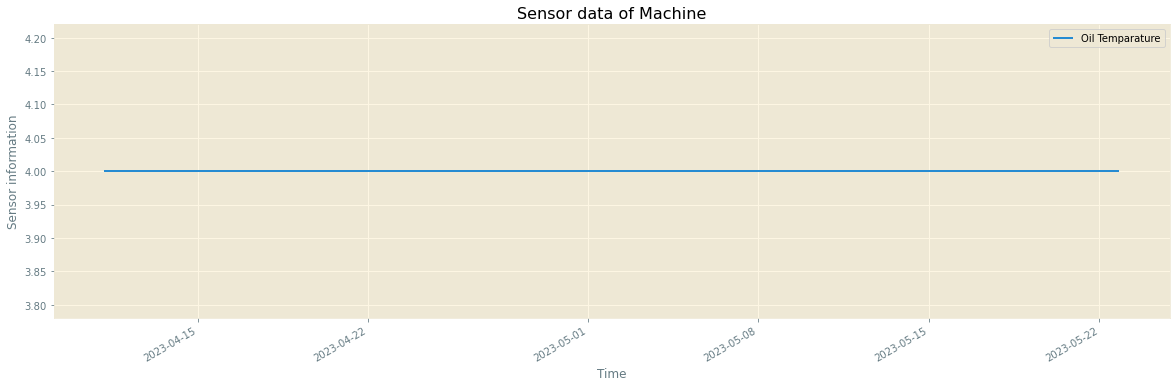

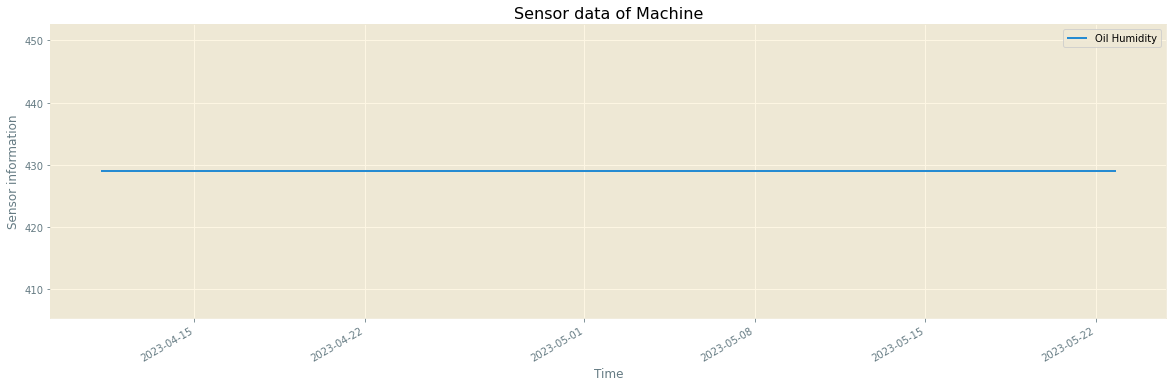

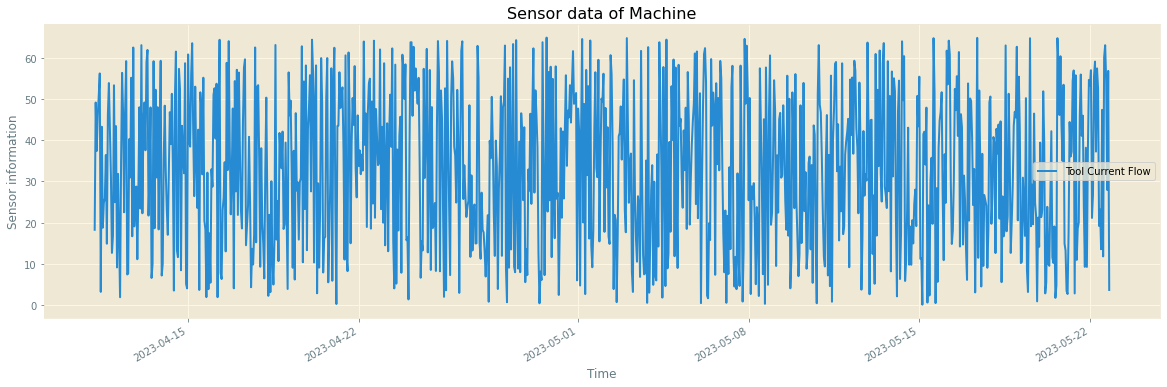

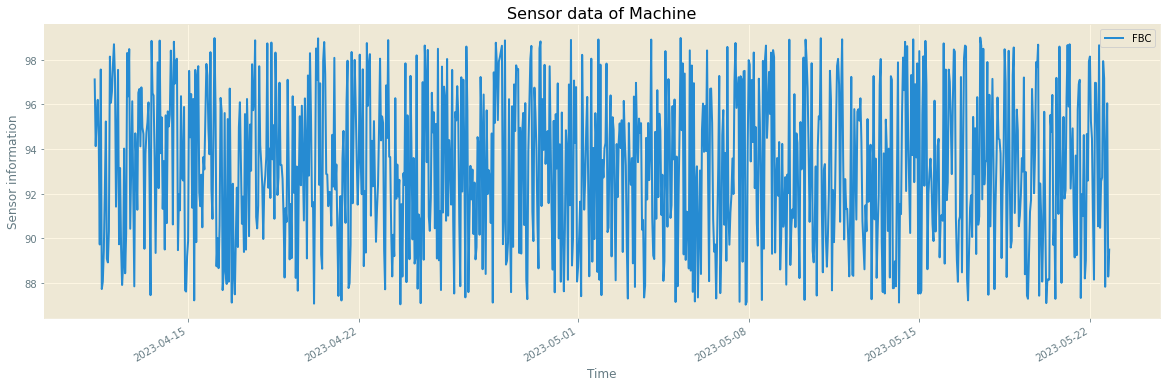

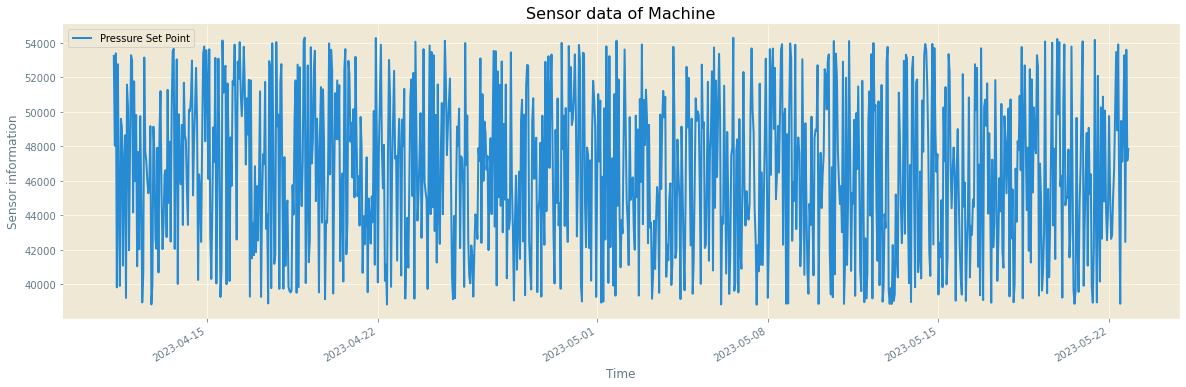

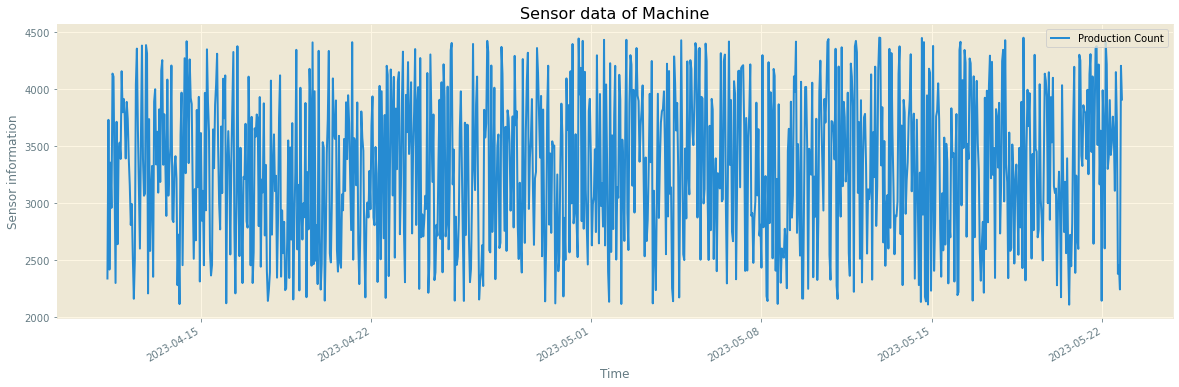

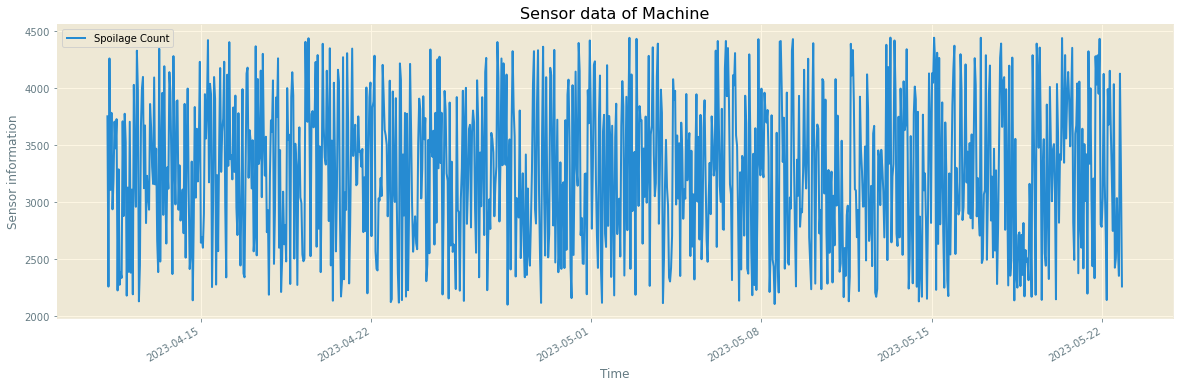

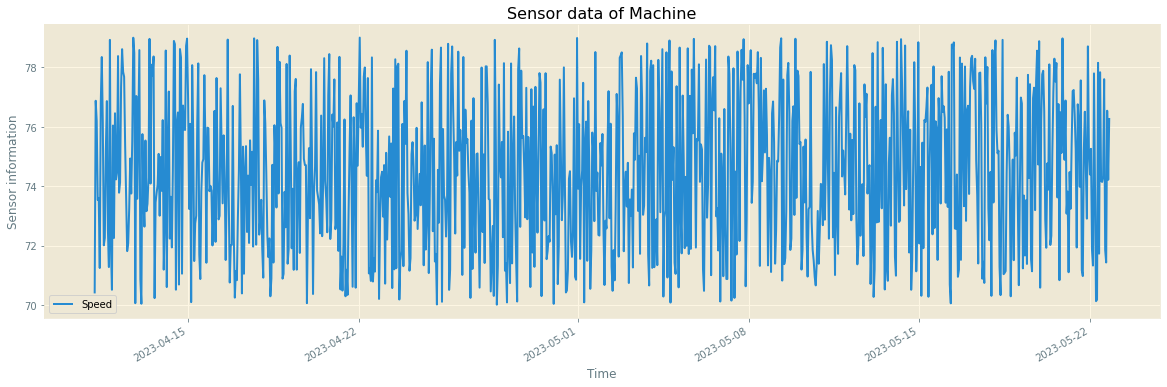

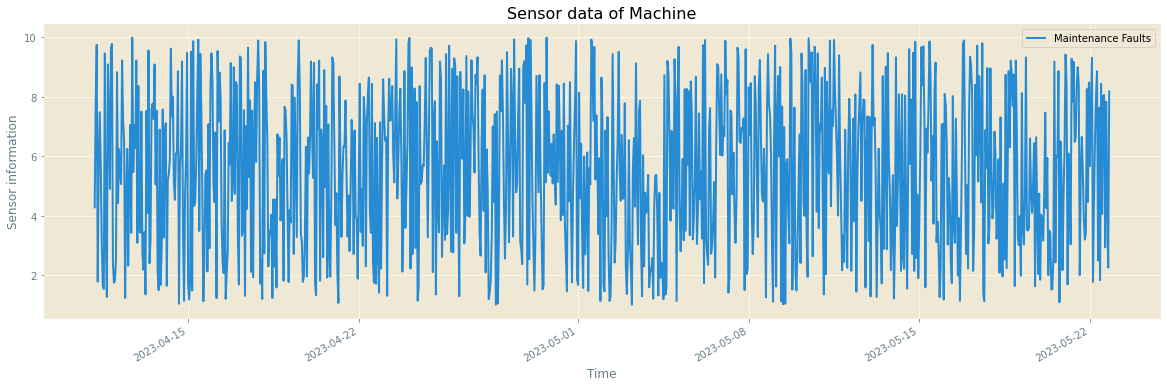

In [109]:
for col in columns:
    machine_data_for_plt= df[["time_stamp", col]].set_index("time_stamp")
    plot_ts(machine_data_for_plt, title=f"Sensor data of Machine", xlabel="Time", ylabel="Sensor information")

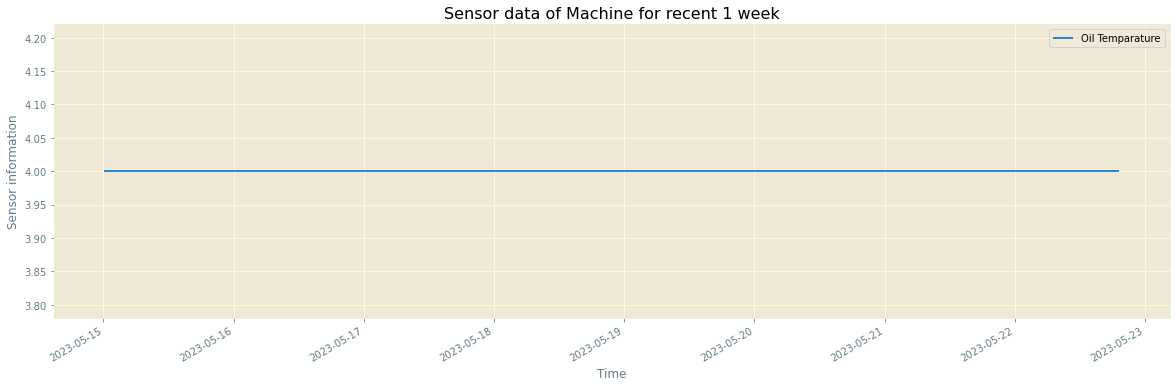

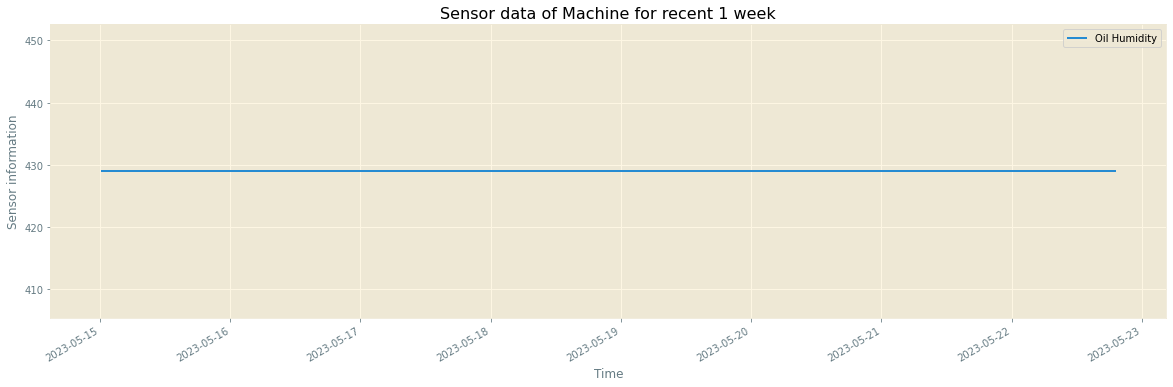

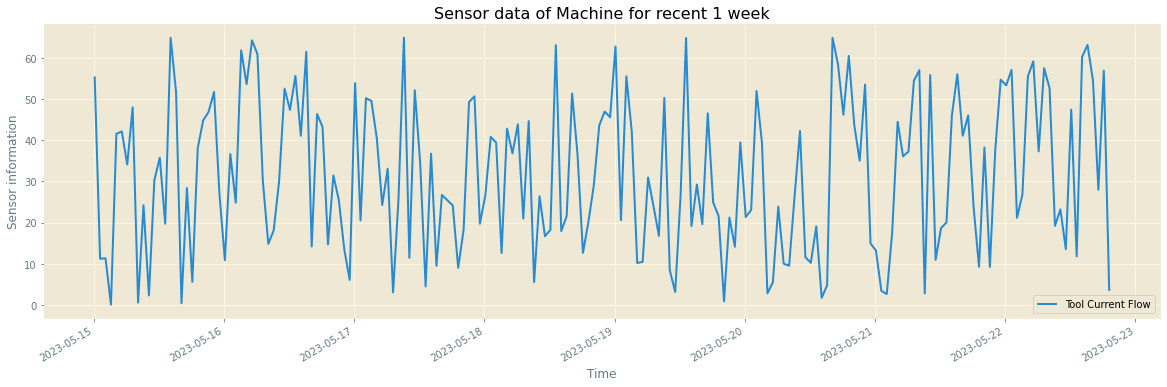

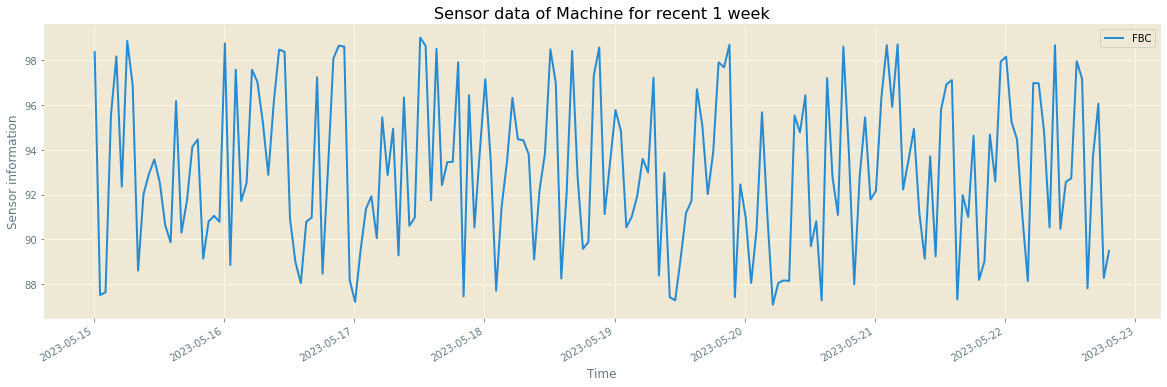

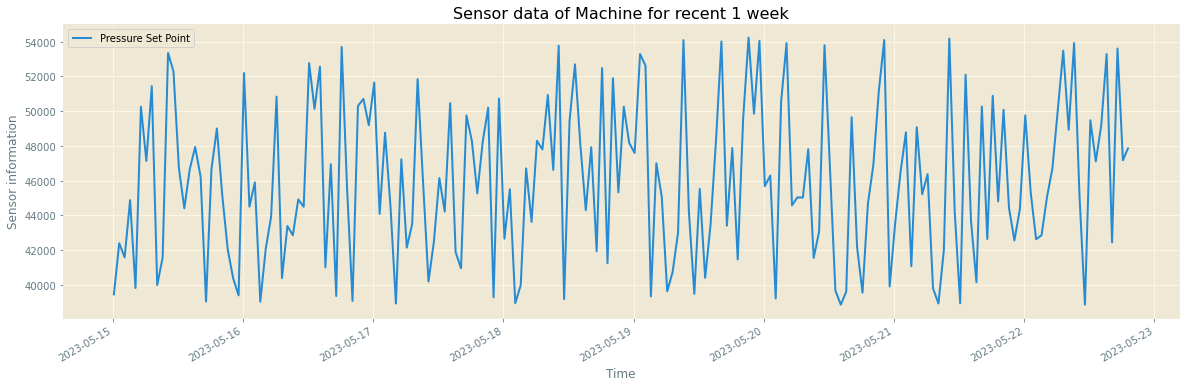

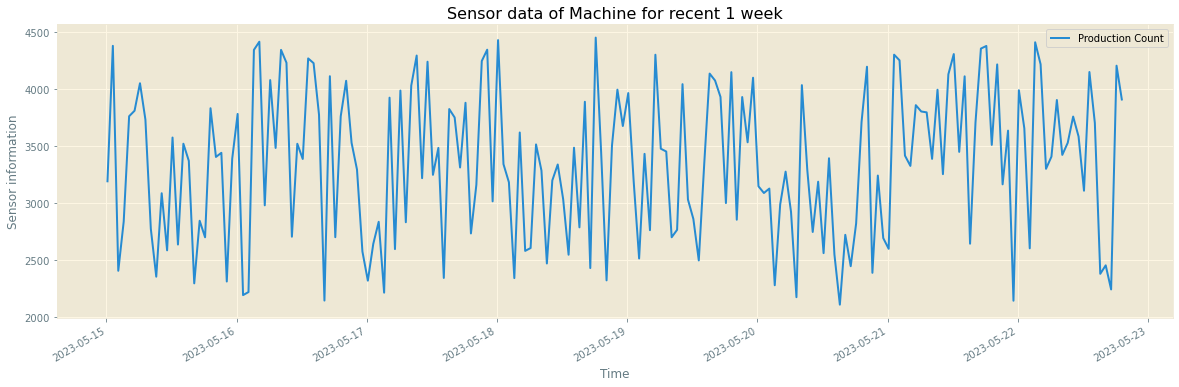

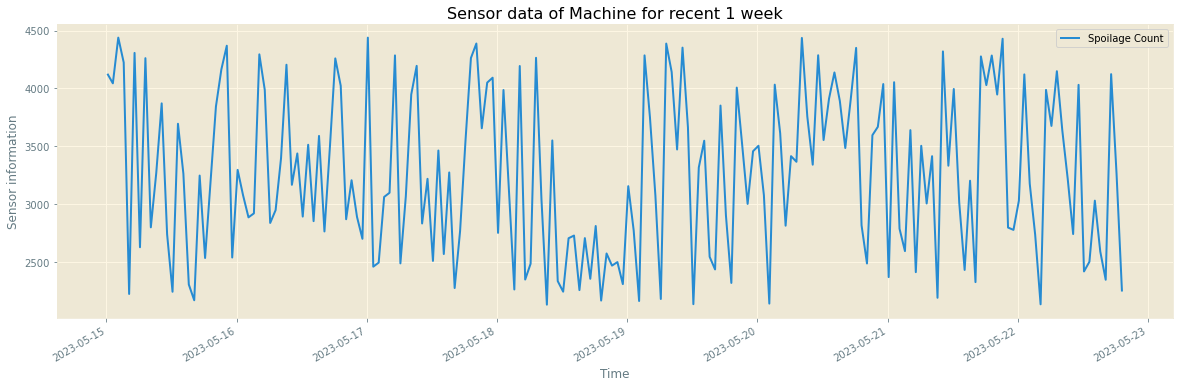

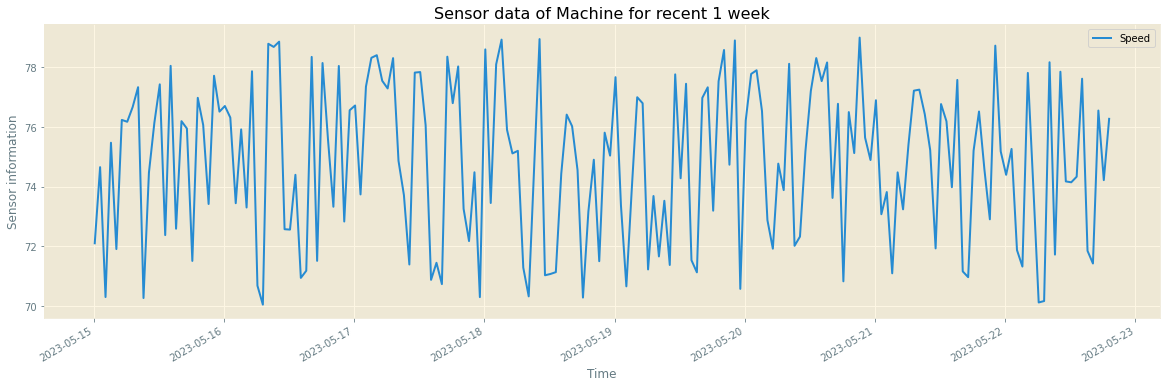

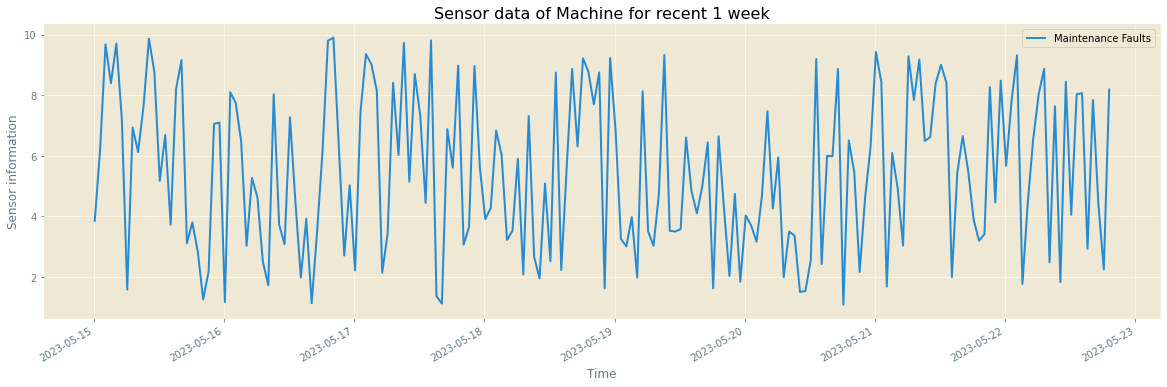

In [110]:
# Plot sensor information of all Machines for 1st two weeks 2022
for col in columns: 
    machine_data_for_plt_first2weeks = df[(df.time_stamp.dt.isocalendar().week.isin([20,21]))][["time_stamp", col]].set_index("time_stamp")
    plot_ts(machine_data_for_plt_first2weeks, title=f"Sensor data of Machine for recent 1 week", xlabel="Time", ylabel="Sensor information")

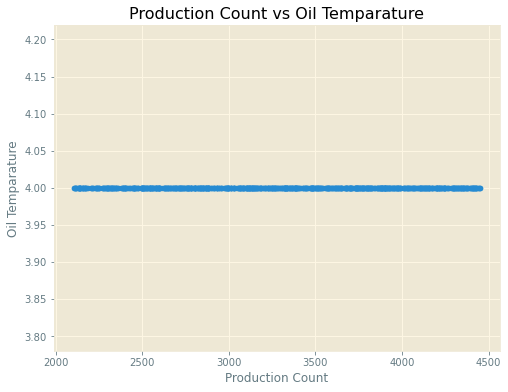

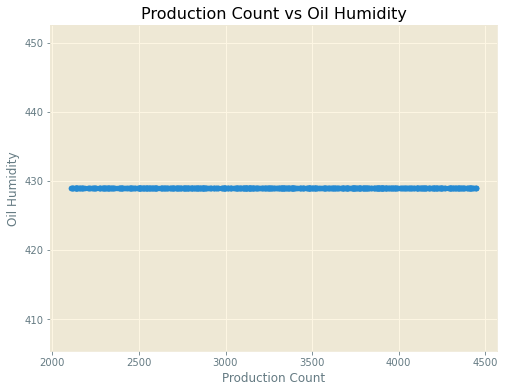

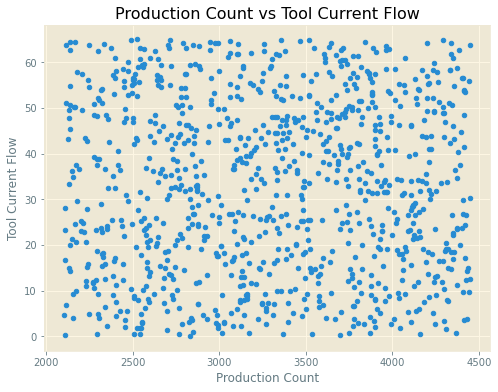

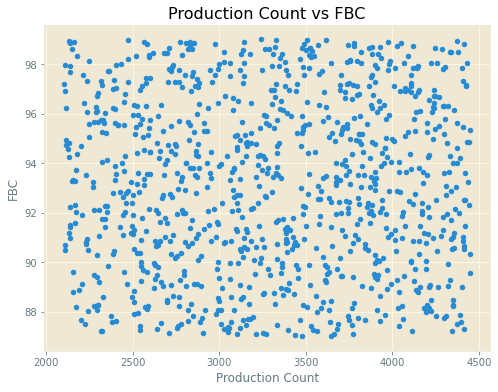

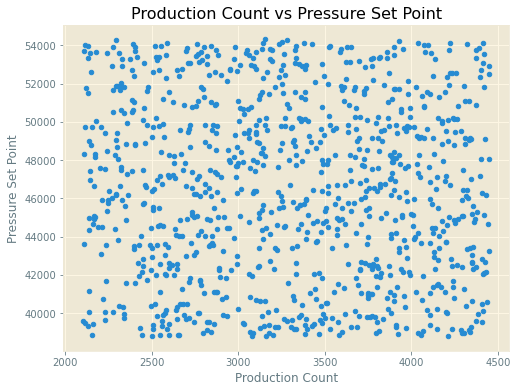

In [111]:
telemetry_data = ['Oil Temparature', 'Oil Humidity','Tool Current Flow','FBC', 'Pressure Set Point']
for col in telemetry_data:
    machine_data_for_plt= df[['Production Count', col]]
    plot_scatter(machine_data_for_plt, 'Production Count', col, figsize=(10,10), 
                 title=f'Production Count vs {col}', xlabel='Production Count', ylabel=col)

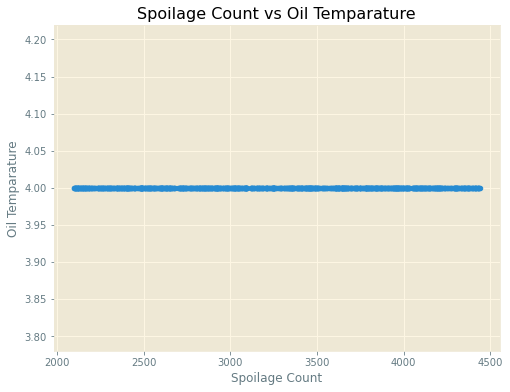

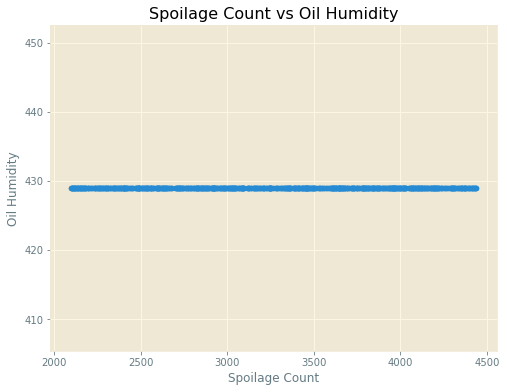

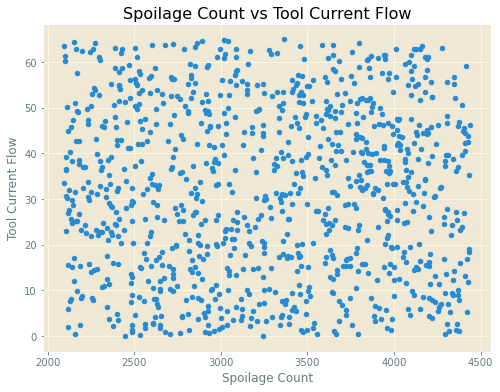

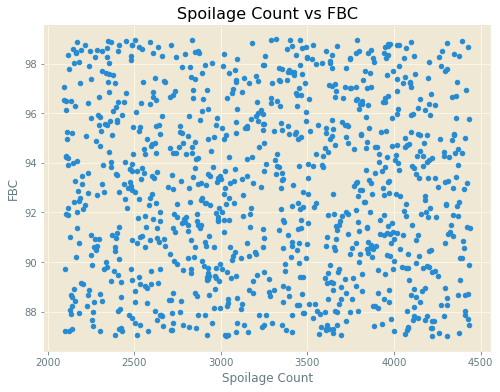

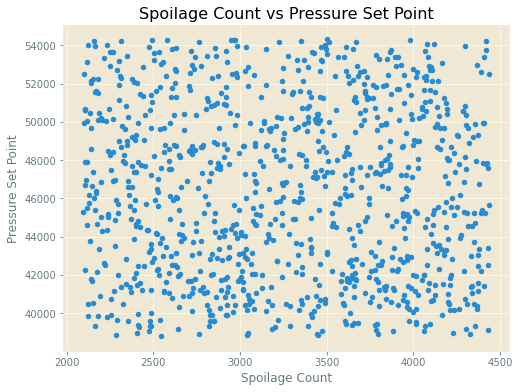

In [99]:
telemetry_data = ['Oil Temparature', 'Oil Humidity','Tool Current Flow','FBC', 'Pressure Set Point']
for col in telemetry_data:
    machine_data_for_plt= df[['Spoilage Count', col]]
    plot_scatter(machine_data_for_plt, 'Spoilage Count', col, figsize=(10,10), 
                 title=f'Spoilage Count vs {col}', xlabel='Spoilage Count', ylabel=col)

<AxesSubplot:>

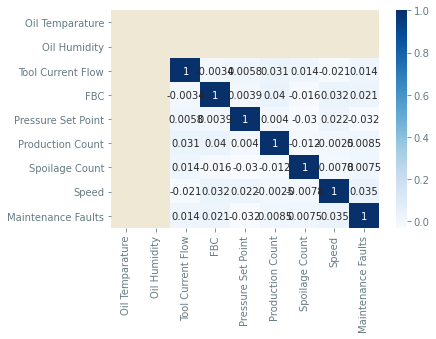

In [100]:
corr_df = df[['Oil Temparature', 'Oil Humidity', 'Tool Current Flow', 'FBC', 'Pressure Set Point', 'Production Count', 'Spoilage Count', 'Speed', 'Maintenance Faults']].corr()

sns.heatmap(corr_df, 
        xticklabels=corr_df.columns,
        yticklabels=corr_df.columns, annot=True, cmap='Blues')

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the sample data into a DataFrame
'''
data = pd.DataFrame({
    'Oil Temperature': [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0],
    'Oil Humidity': [429.0, 429.0, 429.0, 429.0, 429.0, 429.0, 429.0, 429.0, 429.0, 429.0],
    'Tool Current Flow': [53.349032597414805, 45.411344881572525, 13.987099780687055, 40.296114313175934, 17.51709315536134, 21.097475211979116, 9.222988684669865, 41.063550567703466, 40.03280441131675, 63.25111733630299],
    'FBC': [90.10708370135563, 95.6618956224666, 91.34687731063148, 88.94317566329417, 98.07406586588102, 92.56489229962341, 92.4015105455458, 90.07705153295545, 93.7598743341164, 90.09976597522788],
    'Pressure Set Point': [39927.632253092146, 45267.94620525254, 50813.62247562953, 43130.56200361848, 52270.33831598234, 52261.08175773463, 50913.570192152925, 48949.33181087089, 47430.63452467658, 39950.59647057881],
    'Production Count': [2694.3016727948193, 4014.0021569450464, 3460.967756297561, 2329.09027766219, 2627.9912265149906, 2130.081172271918, 3542.033995961935, 3018.971908894048, 4345.555002308132, 3545.647023690108],
    'Spoilage Count': [2296.5225205348806, 3067.2242803798126, 2803.0987623102155, 3157.4694143621573, 4221.30825338996, 3770.1731354738304, 4298.527258119049, 2663.373945461051, 4413.867097981398, 3411.873484280429],
    'Speed': [73.01631576523891, 70.06153799142784, 76.97170820290424, 74.58303879768947, 74.42313143182989, 72.79841052897243, 74.57948319324247, 75.14157702493661, 72.12255087041031, 70.51022588900184],
    'Maintenance Faults': [7.638543965155014, 8.073894088763234, 8.111313225285976, 7.520262583120824, 7.454758331426284, 7.632728838695777, 8.704353624326403, 8.511058365933753, 7.962385941664785, 7.484178033256596]
})
'''

# Calculate the Remaining Useful Life (RUL) by subtracting the maximum value from each observation
df['RUL'] = df['Maintenance Faults'].max() - df['Maintenance Faults']

# Split the data into features (X) and target variable (y)
X = df.drop(['Maintenance Faults', 'RUL'], axis=1)
y = df['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the Remaining Useful Life (RUL) on the test set
rul_pred = model.predict(X_test)

# Print the predicted RUL values
print('Predicted Remaining Useful Life (RUL):')
print(rul_pred)


Predicted Remaining Useful Life (RUL):
[1.01196256 1.00253003 1.04524098 1.16892254 1.0159333  1.11101472
 0.94707084 0.97742108 0.97713441 1.07497954 0.95660403 0.96598926
 0.98959995 1.07203981 0.96741072 1.07471127 1.15904671 0.97229829
 1.09094286 1.0749856  1.08642587 1.07045869 1.0503719  0.95139479
 1.0005359  0.94136411 1.10265685 1.08184603 0.99007281 1.0347143
 0.93659284 0.97132348 1.07578283 1.00374559 0.98349891 0.98966579
 0.96714582 1.16734536 0.91712135 1.01408044 1.03782448 0.97104252
 0.98241459 1.08099655 1.02007695 1.00836934 0.9491755  1.00090474
 0.88742574 0.9964015  1.07153273 1.05038046 0.94231672 1.02031098
 1.06417085 0.98994664 1.06726998 1.00985344 0.98851125 0.98619067
 0.98921114 1.07249455 0.94942677 1.00582334 1.10933613 0.97368456
 1.05670331 1.04397169 1.08432775 0.94289801 1.10372385 1.12485783
 1.07113594 1.05126229 0.96253296 0.90643565 1.00151487 1.04090043
 1.06042736 1.01851889 1.07000127 0.97468658 1.00043081 1.02325686
 1.07573199 1.0420805  0